# Dataset
In this homework, we will continue the `New York City Airbnb Open Data`. You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv) or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv) if you don't want to sign up to Kaggle.

We'll keep working with the 'price' variable, and we'll transform it to a classification task.

# Features
For the rest of the homework, you'll need to use the features from the previous homework with additional two `neighbourhood_group` and `room_type`. So the whole feature set will be set as follows:

* `neighbourhood_group`,
* `room_type`,
* `latitude`,
* `longitude`,
* `price`,
* `minimum_nights`,
* `number_of_reviews`,
* `reviews_per_month`,
* `calculated_host_listings_count`,
* `availability_365`

Select only them and fill in the missing values with 0.

In [1]:
# Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score,  r2_score

In [2]:
airbnb = pd.read_csv("AB_NYC_2019.csv") 
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [3]:
df = airbnb[[
            'neighbourhood_group',
            'latitude',
            'longitude',
            'room_type',
            'minimum_nights',
            'number_of_reviews',
            'reviews_per_month',
            'calculated_host_listings_count',
            'availability_365',
            'price']]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               38843 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
 9   price                           48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Brooklyn,40.64749,-73.97237,Private room,1,9,0.21,6,365,149
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,225
2,Manhattan,40.80902,-73.94190,Private room,3,0,NaN,1,365,150
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,89
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,80


In [4]:
print("Sum of NAN in dataframe before:")
df.isna().sum()

Sum of NAN in dataframe before:


neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [5]:
print("Sum of NAN in dataframe After :")
df = df.fillna(0)
df.isna().sum()

Sum of NAN in dataframe After :


neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

## Q1: What is the most frequent observation (mode) for the column 'neighbourhood_group'?


In [6]:
print("Mode:Computed column-wise:");

df.mode(axis = 0,numeric_only=False,dropna=True)



Mode:Computed column-wise:


,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Manhattan,40.71813,-73.95677,Entire home/apt,1.0,0.0,0.0,1.0,0.0,100.0
1,NaN,NaN,-73.95427,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Mode in `neighbourhood_group` is **Manhattan**

# Split the data

Split your data in train/val/test sets, with **60%/20%/20%** distribution.

Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

Make sure that the target value `('price')` is not in your dataframe.

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)

In [8]:
len(df_train), len(df_val), len(df_test)

(31292, 7824, 9779)

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

## Question 2: 

* Create the correlation matrix for the numerical features of your train dataset.
    * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [10]:
# Categorical Features
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [11]:
categorical_columns

['neighbourhood_group', 'room_type']

In [12]:
numerical = df.select_dtypes(exclude=['object']).columns.tolist()
numerical

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'price']

In [13]:
df_train.corr().T

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.082567,0.024824,-0.007411,-0.009479,0.019051,-0.006793
longitude,0.082567,1.000000,-0.061049,0.055967,0.134702,-0.116155,0.083446
minimum_nights,0.024824,-0.061049,1.000000,-0.074459,-0.118436,0.114218,0.136383
number_of_reviews,-0.007411,0.055967,-0.074459,1.000000,0.591234,-0.072782,0.174931
reviews_per_month,-0.009479,0.134702,-0.118436,0.591234,1.000000,-0.047711,0.166007
calculated_host_listings_count,0.019051,-0.116155,0.114218,-0.072782,-0.047711,1.000000,0.226329
availability_365,-0.006793,0.083446,0.136383,0.174931,0.166007,0.226329,1.000000


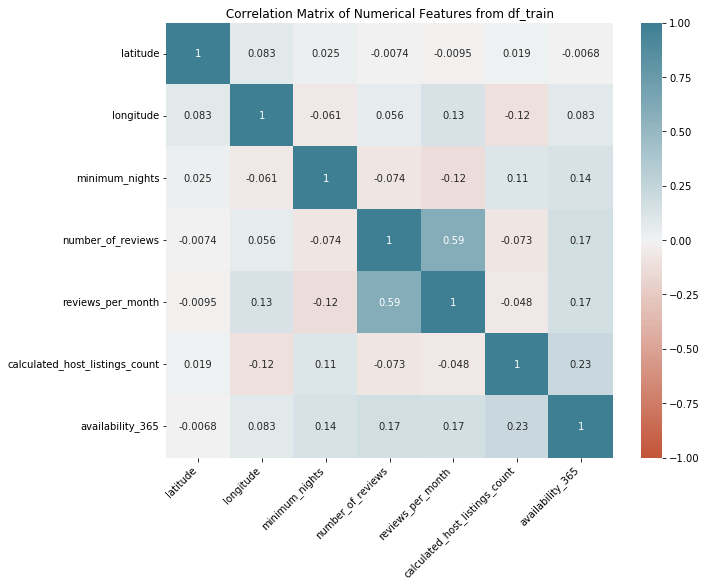

In [14]:
corr = df_train.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    annot= True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title(" Correlation Matrix of Numerical Features from df_train ")
plt.show()

In [15]:
# Credit : https://likegeeks.com/python-correlation-matrix/
corr = df_train.corr()
corr_pairs = corr.unstack()
print(corr_pairs)

latitude                        latitude                          1.000000
                                longitude                         0.082567
                                minimum_nights                    0.024824
                                number_of_reviews                -0.007411
                                reviews_per_month                -0.009479
                                calculated_host_listings_count    0.019051
                                availability_365                 -0.006793
longitude                       latitude                          0.082567
                                longitude                         1.000000
                                minimum_nights                   -0.061049
                                number_of_reviews                 0.055967
                                reviews_per_month                 0.134702
                                calculated_host_listings_count   -0.116155
                         

In [16]:
corr_sorted = corr_pairs.sort_values(kind="quicksort")
print(corr_sorted)

reviews_per_month               minimum_nights                   -0.118436
minimum_nights                  reviews_per_month                -0.118436
calculated_host_listings_count  longitude                        -0.116155
longitude                       calculated_host_listings_count   -0.116155
number_of_reviews               minimum_nights                   -0.074459
minimum_nights                  number_of_reviews                -0.074459
calculated_host_listings_count  number_of_reviews                -0.072782
number_of_reviews               calculated_host_listings_count   -0.072782
longitude                       minimum_nights                   -0.061049
minimum_nights                  longitude                        -0.061049
calculated_host_listings_count  reviews_per_month                -0.047711
reviews_per_month               calculated_host_listings_count   -0.047711
latitude                        reviews_per_month                -0.009479
reviews_per_month        

* The two features that have the biggest correlation in this dataset are :  
    `number_of_reviews   &&   reviews_per_month    with a correlation =       0.591234`

* Make price binary

In [17]:
# use (y_train >= 152).astype(int) or np.where(y_train >= 152, 1, 0)
y_train_above_average = (y_train >= 152).astype(int)  
y_val_above_average = np.where(y_val >= 152, 1, 0)
y_test_above_average = np.where(y_test >= 152, 1, 0)  

## Question 3

* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`

In [18]:
from sklearn.metrics import mutual_info_score

In [19]:
print('The mutual information score for neighbourhood group and binarized price is {0}.'.format(round(mutual_info_score(y_train_above_average, df_train.neighbourhood_group),2)))

The mutual information score for neighbourhood group and binarized price is 0.05.


In [20]:
print('The mutual information score for room type and binarized price is {0}.'.format(round(mutual_info_score(y_train_above_average, df_train.room_type),2)))

The mutual information score for room type and binarized price is 0.14.


* `room_type` and `above_avarage` has got the bigger score for mutual informations.

## Question 4

* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31292 entries, 0 to 31291
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             31292 non-null  object 
 1   latitude                        31292 non-null  float64
 2   longitude                       31292 non-null  float64
 3   room_type                       31292 non-null  object 
 4   minimum_nights                  31292 non-null  int64  
 5   number_of_reviews               31292 non-null  int64  
 6   reviews_per_month               31292 non-null  float64
 7   calculated_host_listings_count  31292 non-null  int64  
 8   availability_365                31292 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.1+ MB


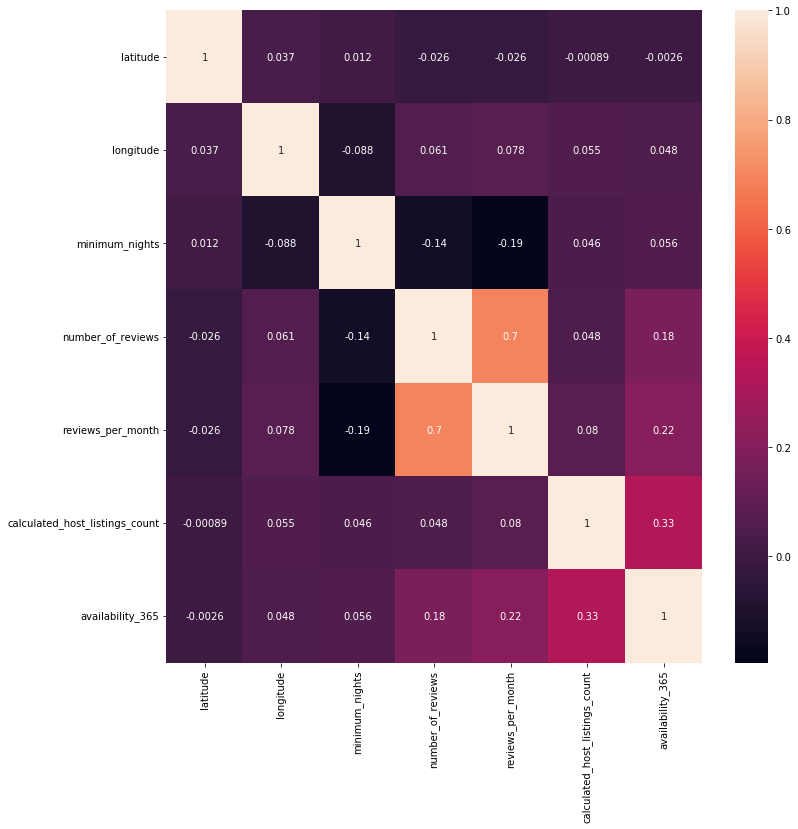

In [22]:
#Get Correlation between different variables
corr = df_train.corr(method='kendall')
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True)
plt.show()

### One-hot encoding


In [23]:
from sklearn.feature_extraction import DictVectorizer

In [24]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
%%time
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train_above_average)

Wall time: 314 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
model.intercept_[0]

-0.09952314935355036

In [28]:
model.coef_[0].round(3)

array([ 3.000e-03,  4.000e-03, -5.967e+00, -3.249e+00, -1.000e-02,
       -7.900e-02,  1.130e-01,  1.579e+00, -4.000e-03, -1.708e+00,
       -4.000e-03, -3.400e-02,  1.948e+00, -8.100e-01, -1.238e+00])

In [29]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'availability_365': 0.003,
 'calculated_host_listings_count': 0.004,
 'latitude': -5.967,
 'longitude': -3.249,
 'minimum_nights': -0.01,
 'neighbourhood_group=Bronx': -0.079,
 'neighbourhood_group=Brooklyn': 0.113,
 'neighbourhood_group=Manhattan': 1.579,
 'neighbourhood_group=Queens': -0.004,
 'neighbourhood_group=Staten Island': -1.708,
 'number_of_reviews': -0.004,
 'reviews_per_month': -0.034,
 'room_type=Entire home/apt': 1.948,
 'room_type=Private room': -0.81,
 'room_type=Shared room': -1.238}

In [30]:
y_pred = model.predict_proba(X_val)[:, 1]

In [31]:
above_avg_price_decision = (y_pred >= 0.5)

In [32]:
(y_val == above_avg_price_decision).mean()

0.0

In [33]:
above_avg_price_decision.astype(int)

array([0, 1, 0, ..., 0, 1, 0])

In [34]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = above_avg_price_decision.astype(int)
df_pred['actual'] = y_val_above_average
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [35]:
df_pred.head()

,probability,prediction,actual,correct
0,0.028764,0,0,True
1,0.591627,1,0,False
2,0.413871,0,1,False
3,0.075215,0,0,True
4,0.813277,1,1,True


In [36]:
round(df_pred.correct.mean(),2)

0.79

* **The accuracy is** 0.79.

## Question 5

* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * neighbourhood_group
    * room_type
    * number_of_reviews
    * reviews_per_month

> note: the difference doesn't have to be positive

### Using all Features 

In [37]:
# model trained with all variables
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train_above_average)
y_pred = model.predict_proba(X_val)[:, 1]
above_avg_price_decision = (y_pred >= 0.5)
df_pred_all = pd.DataFrame()
df_pred_all['probability'] = y_pred
df_pred_all['prediction'] = above_avg_price_decision.astype(int)
df_pred_all['actual'] = y_val_above_average
df_pred_all['correct'] = df_pred_all.prediction == df_pred_all.actual
model_1_acc = round(df_pred_all.correct.mean(),2)
print('Accuracy for the model with all features is {0}.'.format(model_1_acc))

Accuracy for the model with all features is 0.79.


In [38]:
# removed room_type
model_2_features = ['availability_365','calculated_host_listings_count','latitude','longitude','minimum_nights','neighbourhood_group','number_of_reviews','reviews_per_month']

# removed reviews_per_month
model_3_features = ['availability_365','calculated_host_listings_count','latitude','longitude','minimum_nights','neighbourhood_group','number_of_reviews','room_type']

# removed number_of_reviews
model_4_features = ['availability_365','calculated_host_listings_count','latitude','longitude','minimum_nights','neighbourhood_group','reviews_per_month','room_type']

# removed neighbourhood_group
model_5_features = ['availability_365','calculated_host_listings_count','latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','room_type']

# removed minimum_nights
model_6_features = ['availability_365','calculated_host_listings_count','latitude','longitude','neighbourhood_group','number_of_reviews','reviews_per_month','room_type']

# removed longitude
model_7_features = ['availability_365','calculated_host_listings_count','latitude','minimum_nights','neighbourhood_group','number_of_reviews','reviews_per_month','room_type']

# removed latitude
model_8_features = ['availability_365','calculated_host_listings_count','longitude','minimum_nights','neighbourhood_group','number_of_reviews','reviews_per_month','room_type']

# removed calculated_host_listings_count
model_9_features = ['availability_365','latitude','longitude','minimum_nights','neighbourhood_group','number_of_reviews','reviews_per_month','room_type']

# removed availability_365
model_10_features = ['calculated_host_listings_count','latitude','longitude','minimum_nights','neighbourhood_group','number_of_reviews','reviews_per_month','room_type']

In [39]:
accuracy_scores = []

#### Model 2 - Removed room_type

In [41]:
dicts_train_2 = df_train[model_2_features].to_dict(orient='records')
dicts_val_2 = df_val[model_2_features].to_dict(orient='records')
dv_2 = DictVectorizer(sparse=False)
dv_2.fit(dicts_train_2)
X_train_2 = dv_2.transform(dicts_train_2)
X_val_2 = dv_2.transform(dicts_val_2)
model_2 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_2.fit(X_train_2, y_train_above_average)
print(dict(zip(dv_2.get_feature_names(), model_2.coef_[0].round(3))))

y_pred_2 = model_2.predict_proba(X_val_2)[:, 1]
above_avg_price_decision_2 = (y_pred_2 >= 0.5)
df_pred_2 = pd.DataFrame()
df_pred_2['probability'] = y_pred_2
df_pred_2['prediction'] = above_avg_price_decision_2.astype(int)
df_pred_2['actual'] = y_val_above_average
df_pred_2['correct'] = df_pred_2.prediction == df_pred_2.actual
model_2_acc = round(df_pred_2.correct.mean(),2)
accuracy_scores.append(model_2_acc)
print('\nModel 2 accuracy is {0}.'.format(model_2_acc))

{'availability_365': 0.002, 'calculated_host_listings_count': 0.007, 'latitude': -7.839, 'longitude': -4.294, 'minimum_nights': -0.003, 'neighbourhood_group=Bronx': 0.132, 'neighbourhood_group=Brooklyn': 0.045, 'neighbourhood_group=Manhattan': 1.659, 'neighbourhood_group=Queens': -0.03, 'neighbourhood_group=Staten Island': -1.905, 'number_of_reviews': -0.002, 'reviews_per_month': -0.036}

Model 2 accuracy is 0.73.


#### Model 3 - Removed reviews_per_month

In [42]:
dicts_train_3 = df_train[model_3_features].to_dict(orient='records')
dicts_val_3 = df_val[model_3_features].to_dict(orient='records')
dv_3 = DictVectorizer(sparse=False)
dv_3.fit(dicts_train_3)
X_train_3 = dv_3.transform(dicts_train_3)
X_val_3 = dv_3.transform(dicts_val_3)
model_3 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_3.fit(X_train_3, y_train_above_average)
print(dict(zip(dv_3.get_feature_names(), model_3.coef_[0].round(3))))

y_pred_3 = model_3.predict_proba(X_val_3)[:, 1]
above_avg_price_decision_3 = (y_pred_3 >= 0.5)
df_pred_3 = pd.DataFrame()
df_pred_3['probability'] = y_pred_3
df_pred_3['prediction'] = above_avg_price_decision_3.astype(int)
df_pred_3['actual'] = y_val_above_average
df_pred_3['correct'] = df_pred_3.prediction == df_pred_3.actual
model_3_acc = round(df_pred_3.correct.mean(),2)
accuracy_scores.append(model_3_acc)
print('\nModel 3 accuracy is {0}.'.format(model_3_acc))

{'availability_365': 0.003, 'calculated_host_listings_count': 0.004, 'latitude': -5.573, 'longitude': -3.031, 'minimum_nights': -0.01, 'neighbourhood_group=Bronx': -0.137, 'neighbourhood_group=Brooklyn': 0.141, 'neighbourhood_group=Manhattan': 1.579, 'neighbourhood_group=Queens': -0.03, 'neighbourhood_group=Staten Island': -1.627, 'number_of_reviews': -0.004, 'room_type=Entire home/apt': 1.954, 'room_type=Private room': -0.806, 'room_type=Shared room': -1.223}

Model 3 accuracy is 0.79.


#### Model 4 - Removed number_of_reviews

In [43]:
dicts_train_4 = df_train[model_4_features].to_dict(orient='records')
dicts_val_4 = df_val[model_4_features].to_dict(orient='records')
dv_4 = DictVectorizer(sparse=False)
dv_4.fit(dicts_train_4)
X_train_4 = dv_4.transform(dicts_train_4)
X_val_4 = dv_4.transform(dicts_val_4)
model_4 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_4.fit(X_train_4, y_train_above_average)
print(dict(zip(dv_4.get_feature_names(), model_4.coef_[0].round(3))))

y_pred_4 = model_4.predict_proba(X_val_4)[:, 1]
above_avg_price_decision_4 = (y_pred_4 >= 0.5)
df_pred_4 = pd.DataFrame()
df_pred_4['probability'] = y_pred_4
df_pred_4['prediction'] = above_avg_price_decision_4.astype(int)
df_pred_4['actual'] = y_val_above_average
df_pred_4['correct'] = df_pred_4.prediction == df_pred_4.actual
model_4_acc = round(df_pred_4.correct.mean(),2)
accuracy_scores.append(model_4_acc)
print('\nModel 4 accuracy is {0}.'.format(model_4_acc))

{'availability_365': 0.003, 'calculated_host_listings_count': 0.004, 'latitude': -6.012, 'longitude': -3.273, 'minimum_nights': -0.01, 'neighbourhood_group=Bronx': -0.069, 'neighbourhood_group=Brooklyn': 0.11, 'neighbourhood_group=Manhattan': 1.59, 'neighbourhood_group=Queens': 0.025, 'neighbourhood_group=Staten Island': -1.746, 'reviews_per_month': -0.089, 'room_type=Entire home/apt': 1.92, 'room_type=Private room': -0.829, 'room_type=Shared room': -1.181}

Model 4 accuracy is 0.79.


#### Model 5 - Removed neighbourhood_group

In [44]:
dicts_train_5 = df_train[model_5_features].to_dict(orient='records')
dicts_val_5 = df_val[model_5_features].to_dict(orient='records')
dv_5 = DictVectorizer(sparse=False)
dv_5.fit(dicts_train_5)
X_train_5 = dv_5.transform(dicts_train_5)
X_val_5 = dv_5.transform(dicts_val_5)
model_5 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_5.fit(X_train_5, y_train_above_average)
print(dict(zip(dv_5.get_feature_names(), model_5.coef_[0].round(3))))

y_pred_5 = model_5.predict_proba(X_val_5)[:, 1]
above_avg_price_decision_5 = (y_pred_5 >= 0.5)
df_pred_5 = pd.DataFrame()
df_pred_5['probability'] = y_pred_5
df_pred_5['prediction'] = above_avg_price_decision_5.astype(int)
df_pred_5['actual'] = y_val_above_average
df_pred_5['correct'] = df_pred_5.prediction == df_pred_5.actual
model_5_acc = round(df_pred_5.correct.mean(),2)
accuracy_scores.append(model_5_acc)
print('\nModel 5 accuracy is {0}.'.format(model_5_acc))


{'availability_365': 0.002, 'calculated_host_listings_count': 0.008, 'latitude': -0.806, 'longitude': -0.419, 'minimum_nights': -0.007, 'number_of_reviews': -0.004, 'reviews_per_month': -0.063, 'room_type=Entire home/apt': 1.968, 'room_type=Private room': -0.861, 'room_type=Shared room': -1.226}

Model 5 accuracy is 0.75.


#### Model 6 - Removed minimum_nights

In [45]:
dicts_train_6 = df_train[model_6_features].to_dict(orient='records')
dicts_val_6 = df_val[model_6_features].to_dict(orient='records')
dv_6 = DictVectorizer(sparse=False)
dv_6.fit(dicts_train_6)
X_train_6 = dv_6.transform(dicts_train_6)
X_val_6 = dv_6.transform(dicts_val_6)
model_6 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_6.fit(X_train_6, y_train_above_average)
print(dict(zip(dv_6.get_feature_names(), model_6.coef_[0].round(3))))

y_pred_6 = model_6.predict_proba(X_val_6)[:, 1]
above_avg_price_decision_6 = (y_pred_6 >= 0.5)
df_pred_6 = pd.DataFrame()
df_pred_6['probability'] = y_pred_6
df_pred_6['prediction'] = above_avg_price_decision_6.astype(int)
df_pred_6['actual'] = y_val_above_average
df_pred_6['correct'] = df_pred_6.prediction == df_pred_6.actual
model_6_acc = round(df_pred_6.correct.mean(),2)
accuracy_scores.append(model_6_acc)

print('\nModel 6 accuracy is {0}.'.format(model_6_acc))

{'availability_365': 0.003, 'calculated_host_listings_count': 0.003, 'latitude': -5.93, 'longitude': -3.228, 'neighbourhood_group=Bronx': -0.054, 'neighbourhood_group=Brooklyn': 0.112, 'neighbourhood_group=Manhattan': 1.556, 'neighbourhood_group=Queens': 0.011, 'neighbourhood_group=Staten Island': -1.707, 'number_of_reviews': -0.003, 'reviews_per_month': -0.015, 'room_type=Entire home/apt': 1.915, 'room_type=Private room': -0.804, 'room_type=Shared room': -1.193}

Model 6 accuracy is 0.79.


#### Model 7 - Removed longitude

In [46]:
dicts_train_7 = df_train[model_7_features].to_dict(orient='records')
dicts_val_7 = df_val[model_7_features].to_dict(orient='records')
dv_7 = DictVectorizer(sparse=False)
dv_7.fit(dicts_train_7)
X_train_7 = dv_7.transform(dicts_train_7)
X_val_7 = dv_7.transform(dicts_val_7)
model_7 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_7.fit(X_train_7, y_train_above_average)
print(dict(zip(dv_7.get_feature_names(), model_7.coef_[0].round(3))))

y_pred_7 = model_7.predict_proba(X_val_7)[:, 1]
above_avg_price_decision_7 = (y_pred_7 >= 0.5)
df_pred_7 = pd.DataFrame()
df_pred_7['probability'] = y_pred_7
df_pred_7['prediction'] = above_avg_price_decision_7.astype(int)
df_pred_7['actual'] = y_val_above_average
df_pred_7['correct'] = df_pred_7.prediction == df_pred_7.actual
model_7_acc = round(df_pred_7.correct.mean(),2)
accuracy_scores.append(model_7_acc)

print('\nModel 7 accuracy is {0}.'.format(model_7_acc))

{'availability_365': 0.003, 'calculated_host_listings_count': 0.004, 'latitude': -0.072, 'minimum_nights': -0.01, 'neighbourhood_group=Bronx': -1.032, 'neighbourhood_group=Brooklyn': 0.384, 'neighbourhood_group=Manhattan': 1.449, 'neighbourhood_group=Queens': -0.251, 'neighbourhood_group=Staten Island': -0.517, 'number_of_reviews': -0.004, 'reviews_per_month': -0.033, 'room_type=Entire home/apt': 1.998, 'room_type=Private room': -0.811, 'room_type=Shared room': -1.155}

Model 7 accuracy is 0.79.


#### Model 8 - Removed latitude

In [47]:
dicts_train_8 = df_train[model_8_features].to_dict(orient='records')
dicts_val_8 = df_val[model_8_features].to_dict(orient='records')
dv_8 = DictVectorizer(sparse=False)
dv_8.fit(dicts_train_8)
X_train_8 = dv_8.transform(dicts_train_8)
X_val_8 = dv_8.transform(dicts_val_8)
model_8 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_8.fit(X_train_8, y_train_above_average)
print(dict(zip(dv_8.get_feature_names(), model_8.coef_[0].round(3))))

y_pred_8 = model_8.predict_proba(X_val_8)[:, 1]
above_avg_price_decision_8 = (y_pred_8 >= 0.5)
df_pred_8 = pd.DataFrame()
df_pred_8['probability'] = y_pred_8
df_pred_8['prediction'] = above_avg_price_decision_8.astype(int)
df_pred_8['actual'] = y_val_above_average
df_pred_8['correct'] = df_pred_8.prediction == df_pred_8.actual
model_8_acc = round(df_pred_8.correct.mean(),2)
accuracy_scores.append(model_8_acc)
print('\nModel 8 accuracy is {0}.'.format(model_8_acc))

{'availability_365': 0.003, 'calculated_host_listings_count': 0.004, 'longitude': 0.038, 'minimum_nights': -0.01, 'neighbourhood_group=Bronx': -1.044, 'neighbourhood_group=Brooklyn': 0.359, 'neighbourhood_group=Manhattan': 1.419, 'neighbourhood_group=Queens': -0.281, 'neighbourhood_group=Staten Island': -0.474, 'number_of_reviews': -0.004, 'reviews_per_month': -0.033, 'room_type=Entire home/apt': 1.972, 'room_type=Private room': -0.837, 'room_type=Shared room': -1.156}

Model 8 accuracy is 0.79.


#### Model 9 - Removed calculated_host_listings_count

In [48]:
dicts_train_9 = df_train[model_9_features].to_dict(orient='records')
dicts_val_9 = df_val[model_9_features].to_dict(orient='records')
dv_9 = DictVectorizer(sparse=False)
dv_9.fit(dicts_train_9)
X_train_9 = dv_9.transform(dicts_train_9)
X_val_9 = dv_9.transform(dicts_val_9)
model_9 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_9.fit(X_train_9, y_train_above_average)
print(dict(zip(dv_9.get_feature_names(), model_9.coef_[0].round(3))))

y_pred_9 = model_9.predict_proba(X_val_9)[:, 1]
above_avg_price_decision_9 = (y_pred_9 >= 0.5)
df_pred_9 = pd.DataFrame()
df_pred_9['probability'] = y_pred_9
df_pred_9['prediction'] = above_avg_price_decision_9.astype(int)
df_pred_9['actual'] = y_val_above_average
df_pred_9['correct'] = df_pred_9.prediction == df_pred_9.actual
model_9_acc = round(df_pred_9.correct.mean(),2)
accuracy_scores.append(model_9_acc)
print('\nModel 9 accuracy is {0}.'.format(model_9_acc))

{'availability_365': 0.003, 'latitude': -6.035, 'longitude': -3.286, 'minimum_nights': -0.009, 'neighbourhood_group=Bronx': -0.004, 'neighbourhood_group=Brooklyn': 0.14, 'neighbourhood_group=Manhattan': 1.637, 'neighbourhood_group=Queens': 0.028, 'neighbourhood_group=Staten Island': -1.878, 'number_of_reviews': -0.004, 'reviews_per_month': -0.036, 'room_type=Entire home/apt': 1.936, 'room_type=Private room': -0.839, 'room_type=Shared room': -1.175}

Model 9 accuracy is 0.79.


#### Model 10 - Removed availability_365

In [49]:
dicts_train_10 = df_train[model_10_features].to_dict(orient='records')
dicts_val_10 = df_val[model_10_features].to_dict(orient='records')
dv_10 = DictVectorizer(sparse=False)
dv_10.fit(dicts_train_10)
X_train_10 = dv_10.transform(dicts_train_10)
X_val_10 = dv_10.transform(dicts_val_10)
model_10 = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model_10.fit(X_train_10, y_train_above_average)
dict(zip(dv_10.get_feature_names(), model_10.coef_[0].round(3)))

y_pred_10 = model_10.predict_proba(X_val_10)[:, 1]
above_avg_price_decision_10 = (y_pred_10 >= 0.5)
df_pred_10 = pd.DataFrame()
df_pred_10['probability'] = y_pred_10
df_pred_10['prediction'] = above_avg_price_decision_10.astype(int)
df_pred_10['actual'] = y_val_above_average
df_pred_10['correct'] = df_pred_10.prediction == df_pred_10.actual
model_10_acc = round(df_pred_10.correct.mean(),2)
accuracy_scores.append(model_10_acc)
print('\nModel 10 accuracy is {0}.'.format(model_10_acc))


Model 10 accuracy is 0.78.


In [69]:
data = {'model': ['Model 1','Model 2','Model 3','Model 4','Model 5','Model 6','Model 7','Model 8','Model 9','Model 10'],
        'desc': ['All','No room_type','No reviews_per_month','No number_of_reviews','No neighbourhood_group','No minimum_nights','No longitude','No latitude','No calculated_host_listings_count','No availability_365'],
        'accuracy': [model_1_acc, model_2_acc, model_3_acc, model_4_acc, model_5_acc, model_6_acc, model_7_acc, model_8_acc, model_9_acc, model_10_acc],
        'diff_model_1_acc': [model_1_acc - model_1_acc, model_2_acc - model_1_acc, model_3_acc - model_1_acc, model_4_acc - model_1_acc, model_5_acc - model_1_acc,
                             model_6_acc - model_1_acc, model_7_acc - model_1_acc, model_8_acc - model_1_acc, model_9_acc - model_1_acc, model_10_acc - model_1_acc]
       }
summary = pd.DataFrame(data)
summary.style.highlight_min(axis=0,color="yellow")\
        .highlight_max(axis=0, color="red")

,model,desc,accuracy,diff_model_1_acc
0,Model 1,All,0.790000,0.000000
1,Model 2,No room_type,0.730000,-0.060000
2,Model 3,No reviews_per_month,0.790000,0.000000
3,Model 4,No number_of_reviews,0.790000,0.000000
4,Model 5,No neighbourhood_group,0.750000,-0.040000
5,Model 6,No minimum_nights,0.790000,0.000000
6,Model 7,No longitude,0.790000,0.000000
7,Model 8,No latitude,0.790000,0.000000
8,Model 9,No calculated_host_listings_count,0.790000,0.000000
9,Model 10,No availability_365,0.780000,-0.010000


* Both `number_of_reviews` and `reviews_per_month` have the same accuracy as the model with all features.

## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter alpha. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

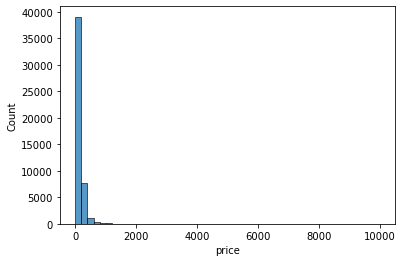

In [62]:
sns.histplot(df.price, bins=50)
plt.show()

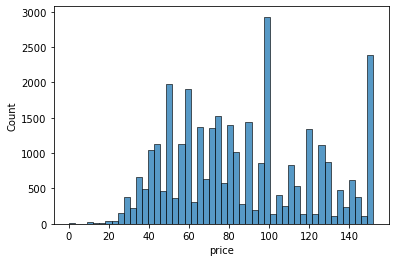

In [72]:
sns.histplot(df.price[df.price <= 152],bins=50)
plt.show()

In [73]:
df.isin([0]).sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                  17533
price                                11
dtype: int64

In [74]:
print('y_train has {0} zeros.'.format(len(y_train) - np.count_nonzero(y_train)))

print('y_val has {0} zero.'.format(len(y_val) - np.count_nonzero(y_val)))

print('y_test has {0} zeros.'.format(len(y_test) - np.count_nonzero(y_test)))

y_train has 9 zeros.
y_val has 0 zero.
y_test has 2 zeros.


In [78]:
# let's fill the 0's with the mean of price 

mean_price = round(df.price.mean(),2)
mean_price

152.72

In [79]:
# fill in zeros
y_train[y_train == 0] = mean_price
y_val[y_val == 0] = mean_price
y_test[y_test == 0] = mean_price

In [80]:
# take the log
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)
y_test_log = np.log(y_test)

In [84]:
from sklearn.linear_model import Ridge
alpha_values = [0, 0.01, 0.1, 1, 10]
rmses = []

for alpha in alpha_values:
    model = Ridge(alpha)
    model.fit(X_train, y_train_log)
    pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val_log, pred))
    rmses.append(rmse)
    print('Ridge Regression with alpha = {0}    ,RMSE on validation set is {1}'.format(alpha, round(rmse,5)))

Ridge Regression with alpha = 0    ,RMSE on validation set is 0.50155
Ridge Regression with alpha = 0.01    ,RMSE on validation set is 0.5016
Ridge Regression with alpha = 0.1    ,RMSE on validation set is 0.5016
Ridge Regression with alpha = 1    ,RMSE on validation set is 0.50163
Ridge Regression with alpha = 10    ,RMSE on validation set is 0.50234


In [85]:
from sklearn.linear_model import Ridge
alpha_values = [0, 0.01, 0.1, 1, 10]
rmses = []

for alpha in alpha_values:
    model = Ridge(alpha)
    model.fit(X_train, y_train_log)
    pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val_log, pred))
    rmses.append(rmse)
    print('Ridge Regression with alpha = {0}    ,RMSE on validation set is {1}'.format(alpha, round(rmse,3)))

Ridge Regression with alpha = 0    ,RMSE on validation set is 0.502
Ridge Regression with alpha = 0.01    ,RMSE on validation set is 0.502
Ridge Regression with alpha = 0.1    ,RMSE on validation set is 0.502
Ridge Regression with alpha = 1    ,RMSE on validation set is 0.502
Ridge Regression with alpha = 10    ,RMSE on validation set is 0.502


* There are multiple options, so the smallest `alpha = 0 `.